Imports

In [1]:
# Install core and visualization libraries
!pip install --upgrade --quiet json-repair networkx langchain-core langchain-google-vertexai langchain-experimental langchain-community langchain_google_genai

# Install additional libraries for scraping and plotting
!pip install --upgrade --quiet requests beautifulsoup4 matplotlib ipywidgets gravis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.1/659.1 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 M

In [2]:
import os
from langchain_experimental.graph_transformers import LLMGraphTransformer
import networkx as nx
import matplotlib.pyplot as plt
import gravis as gv
import plotly.graph_objects as go

from IPython.display import display, clear_output
import ipywidgets as widgets
from langchain.chains import GraphQAChain
from langchain_core.documents import Document
from langchain_community.graphs.networkx_graph import NetworkxEntityGraph
from langchain.indexes import GraphIndexCreator
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.schema import HumanMessage, SystemMessage

LLM Model Pipeline

In [3]:
# Set up the Google API Key
google_api_key = "your_key"  # Replace with your actual API key
os.environ["GOOGLE_API_KEY"] = google_api_key

# Initialize the ChatGoogleGenerativeAI model
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    temperature=0.2,
    verbose=True
)

In [4]:
# Test the model
output = llm.invoke("Write a brief introduction about Llama models.")
print(output.content)

Llama models are a family of large language models (LLMs) developed by Meta AI.  Known for their impressive capabilities in natural language processing tasks, they are notable for being relatively open-source, allowing researchers and developers broader access compared to many other comparable LLMs.  This accessibility has spurred significant advancements and innovation within the field, contributing to both improvements in the models themselves and the development of new applications.  While initially smaller than some competing models, subsequent iterations have significantly increased in size and capabilities, solidifying their position as a major player in the LLM landscape.


Create Text Corpus

In [5]:
import requests
from bs4 import BeautifulSoup

# Fetch the page
url = "https://en.wikipedia.org/wiki/Pattam_Pole"
response = requests.get(url)

# Parse the page content
soup = BeautifulSoup(response.text, 'html.parser')

# Extract all paragraphs
content = soup.find_all('p')
text = "\n".join([para.get_text() for para in content])

# Save the text to a file
with open("pattam_pole.txt", "w", encoding="utf-8") as file:
    file.write(text)

print("Text file created successfully.")

Text file created successfully.


LLMGraphTransformer

In [ ]:
# !pip install --upgrade huggingface_hub
# from huggingface_hub import login

# login(token="your_key")

# # Name: GraphRAG

# os.environ["LANGCHAIN_API_KEY"] = "your_key"
# os.environ["LANGCHAIN_TRACING_V2"] = "True"
# os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
# os.environ["LANGCHAIN_PROJECT"] = "project_graphRAG"

# print(os.getenv("LANGCHAIN_API_KEY"))  # Should print your API key

In [ ]:
# model_name = "TheBloke/Llama-2-7B-Chat-GPTQ"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForCausalLM.from_pretrained(model_name)

In [ ]:
# # Use HuggingFacePipeline to wrap the model
# generator = pipeline(
#     "text-generation",
#     model=model,
#     tokenizer=tokenizer,
#     max_new_tokens=400,  # Limit output generation
#     # device=0 if torch.cuda.is_available() else -1,  # Use GPU if available
# )
# llm = HuggingFacePipeline(pipeline=generator)

In [ ]:
# result = llm.invoke("Who is Marie Curie?")
# print(result.content)

# result = llm.invoke("Who was the first woman to become professor at University of Paris?")
# print(result.content)

In [ ]:
# from langchain_experimental.graph_transformers import LLMGraphTransformer
# from langchain_core.documents import Document

# text = """Marie Curie, born in 1867, was a Polish and naturalised-French physicist and chemist who conducted pioneering research on radioactivity.
# She was the first woman to win a Nobel Prize, the first person to win a Nobel Prize twice, and the only person to win a Nobel Prize in two scientific fields.
# Her husband, Pierre Curie, was a co-winner of her first Nobel Prize, making them the first-ever married couple to win the Nobel Prize and launching the
# Curie family legacy of five Nobel Prizes.She was, in 1906, the first woman to become a professor at the University of Paris."""

# from langchain_core.documents import Document
# documents = [Document(page_content=text)]
# llm_transformer = LLMGraphTransformer(llm=llm)
# graph_documents = llm_transformer.convert_to_graph_documents(documents)

# # Output the result (check the graph structure)
# print(graph_documents)

In [ ]:
# llm_transformer_filtered = LLMGraphTransformer(
#     llm=llm,
#     allowed_nodes=["Person", "Country", "Organization"],
#     allowed_relationships=["NATIONALITY", "LOCATED_IN", "WORKED_AT", "SPOUSE"],
# )
# graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(
#     documents)

# graph = NetworkxEntityGraph()

# # Add nodes to the graph
# for node in graph_documents_filtered[0].nodes:
#     graph.add_node(node.id)

# # Add edges to the graph
# for edge in graph_documents_filtered[0].relationships:
#     graph._graph.add_edge(
#             edge.source.id,
#             edge.target.id,
#             relation=edge.type,
#         )

In [ ]:
# graph_documents_filtered[0].relationships

In [ ]:
# chain = GraphQAChain.from_llm(
#     llm=llm,
#     graph=graph,
#     verbose=True
# )

In [ ]:
# question = """Who is Marie Curie?"""
# # chain.run(question)

# # Simulate the chain output (replace with the actual output object if different)
# chain_output = chain.invoke(question)

# # Extract the "result" part
# raw_result = chain_output['result']

# print(raw_result)

# # Remove examples and clean up
# cleaned_result = raw_result.split("Knowledge Triplets:")[-1]  # Extract after "Knowledge Triplets:"
# cleaned_result = cleaned_result.replace("\\n", "\n").strip()  # Replace escaped newlines and trim

# # Display cleaned result
# print(cleaned_result)

In [ ]:
# question = "Who was the first woman to become professor at University of Paris?"
# # chain.run(question)

# # Simulate the chain output (replace with the actual output object if different)
# chain_output = chain.invoke(question)

# # Extract the "result" part
# raw_result = chain_output['result']

# print(raw_result)

# # Remove examples and clean up
# cleaned_result = raw_result.split("Knowledge Triplets:")[-1]  # Extract after "Knowledge Triplets:"
# cleaned_result = cleaned_result.replace("\\n", "\n").strip()  # Replace escaped newlines and trim

# # Display cleaned result
# print(cleaned_result)

GraphIndexCreator

In [7]:
index_creator = GraphIndexCreator(llm=llm)

with open("pattam_pole.txt") as f:
    all_text = f.read()

text = "\n".join(all_text.split("\n\n"))
graph = index_creator.from_text(text)

print(graph.get_triples())

[('Pattam Pole', '2013 Malayalam romantic film', 'is a'), ('Pattam Pole', 'Like a Kite', 'English title'), ('Pattam Pole', 'Alagappan N', 'directed by'), ('Pattam Pole', 'Dulquer Salmaan', 'stars'), ('Pattam Pole', 'Malavika Mohanan', 'stars'), ('Pattam Pole', 'Alagappan', 'marks the directorial debut of'), ('Pattam Pole', 'June 2013', 'commenced production in'), ('Pattam Pole', 'Kumbakonam in Tamil Nadu', 'production location'), ('Pattam Pole', 'Alappuzha in Kerala', 'major location'), ('Pattam Pole', 'negative reviews', 'received'), ('Pattam Pole', 'M. Jayachandran', 'features songs composed by'), ('Pattam Pole', 'Santhosh Verma and Annamalai', 'features songs written by'), ('Alagappan N', 'directorial debut', 'makes his'), ('Malavika Mohanan', 'acting debut', 'in her'), ('Archana Kavi', 'supporting role in Pattam Pole', 'plays'), ('Anoop Menon', 'supporting role in Pattam Pole', 'plays'), ('Lalu Alex', 'supporting role in Pattam Pole', 'plays'), ('Jayaprakash', 'supporting role in P

In [ ]:
# def compare_answers(question, llm, graph):
#     # Get the answers from both sources
#     answer_llm = llm.invoke(question)
#     chain = GraphQAChain.from_llm(llm, graph=graph, verbose=False)
#     answer_graph = chain.invoke(question)

#     # Print both answers side by side without a newline after the LLM result
#     print(f"Question: {question}")
#     print(f"Baseline LLM result: {answer_llm.content}", end='')
#     print(f"GraphRAG supported result: {answer_graph['result']}")

In [ ]:
def compare_answers_llm(question, llm, graph, context_file="pattam_pole.txt"):
    conversation = []
    if context_file:
        with open(context_file, "r") as file:
            context = file.read()
        system_message = SystemMessage(content=f"This is the entire context for the conversation:\n\n{context}")
        conversation.append(system_message)

    # Add the question to the conversation
    conversation.append(HumanMessage(content=question))

    # Get the answer from the LLM without context
    answer_llm_no_context = llm.invoke(question)

    # Get the answer from the LLM with context (if context is provided)
    if context_file:
        answer_llm_with_context = llm.invoke(conversation)
    else:
        answer_llm_with_context = None

    # Get the answer from the GraphQAChain
    chain = GraphQAChain.from_llm(llm, graph=graph, verbose=False)
    answer_graph = chain.invoke(question)

    # Print all results
    print(f"Question: {question}")
    print()
    print(f"Baseline LLM result (without context): {answer_llm_no_context.content}")
    print()
    print(f"Baseline LLM result (with context): {answer_llm_with_context.content}")
    print()
    print(f"GraphRAG supported result: {answer_graph['result']}")

In [ ]:
question = "Who was director of Pattam Pole?"
compare_answers_llm(question, llm, graph)

Question: Who was director of Pattam Pole?

Baseline LLM result (without context): The director of the Malayalam film *Pattam Pole* is **Lijeesh**.

Baseline LLM result (with context): Alagappan N.  This was his directorial debut.

GraphRAG supported result: Alagappan N


In [ ]:
question = "Who was lead actor of Pattam Pole?"
compare_answers_llm(question, llm, graph)

Question: Who was lead actor of Pattam Pole?

Baseline LLM result (without context): The lead actor of the Malayalam film Pattam Pole was **Mammootty**.

Baseline LLM result (with context): Dulquer Salmaan was the lead actor in Pattam Pole.

GraphRAG supported result: Dulquer Salmaan


In [ ]:
question = "Where was the major production location of Pattam Pole?"
compare_answers_llm(question, llm, graph)

Question: Where was the major production location of Pattam Pole?

Baseline LLM result (without context): The major production location of the Malayalam film *Pattam Pole* was **Trivandrum (Thiruvananthapuram), Kerala, India**.

Baseline LLM result (with context): The major production location of Pattam Pole was Alappuzha in Kerala.

GraphRAG supported result: Alappuzha in Kerala


In [ ]:
question = "What is English meaning of Pattam Pole?"
compare_answers_llm(question, llm, graph)

Question: What is English meaning of Pattam Pole?

Baseline LLM result (without context): "Pattam Pole" doesn't have a direct, single-word English translation.  It's a Malayalam phrase (from the South Indian state of Kerala) that refers to a **silk saree with a distinctive border**.  The meaning is more accurately conveyed by describing the type of saree rather than translating it literally.

Baseline LLM result (with context): The English meaning of Pattam Pole is "Like a Kite".

GraphRAG supported result: Like a Kite


In [ ]:
question = "Tell about Riya and Karthi"
compare_answers_llm(question, llm, graph,context_file="pattam_pole.txt")

Question: Tell about Riya and Karthi

Baseline LLM result (without context): Without more information, I can only offer a generic response about Riya and Karthi.  Riya and Karthi could be:

* **Friends:**  They might have known each other for years, sharing common interests, experiences, and inside jokes. Their relationship could be casual or deeply meaningful.

* **Family:** They could be siblings, cousins, or even more distant relatives. Their relationship would be shaped by family dynamics and shared history.

* **Romantic partners:**  They could be dating, engaged, or married.  Their relationship would likely involve intimacy, commitment, and shared goals.

* **Colleagues:** They might work together in the same company or field. Their relationship would be professional, although friendships or romantic relationships could develop alongside their professional interactions.

* **Complete strangers:**  They might have never met before.

To tell you *about* Riya and Karthi, I need more

Graph Creation

In [8]:
graph.write_to_gml("graph.gml")

In [9]:
loaded_graph = NetworkxEntityGraph.from_gml("graph.gml")

In [10]:
loaded_graph.get_triples()

[('Pattam Pole', '2013 Malayalam romantic film', 'is a'),
 ('Pattam Pole', 'Like a Kite', 'English title'),
 ('Pattam Pole', 'Alagappan N', 'directed by'),
 ('Pattam Pole', 'Dulquer Salmaan', 'stars'),
 ('Pattam Pole', 'Malavika Mohanan', 'stars'),
 ('Pattam Pole', 'Alagappan', 'marks the directorial debut of'),
 ('Pattam Pole', 'June 2013', 'commenced production in'),
 ('Pattam Pole', 'Kumbakonam in Tamil Nadu', 'production location'),
 ('Pattam Pole', 'Alappuzha in Kerala', 'major location'),
 ('Pattam Pole', 'negative reviews', 'received'),
 ('Pattam Pole', 'M. Jayachandran', 'features songs composed by'),
 ('Pattam Pole', 'Santhosh Verma and Annamalai', 'features songs written by'),
 ('Alagappan N', 'directorial debut', 'makes his'),
 ('Malavika Mohanan', 'acting debut', 'in her'),
 ('Archana Kavi', 'supporting role in Pattam Pole', 'plays'),
 ('Anoop Menon', 'supporting role in Pattam Pole', 'plays'),
 ('Lalu Alex', 'supporting role in Pattam Pole', 'plays'),
 ('Jayaprakash', 'sup

In [11]:
# Load the graph from a GML file
graph = nx.read_gml("graph.gml")

# Display basic information about the graph
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())

Number of nodes: 60
Number of edges: 47


Graph Visualisation

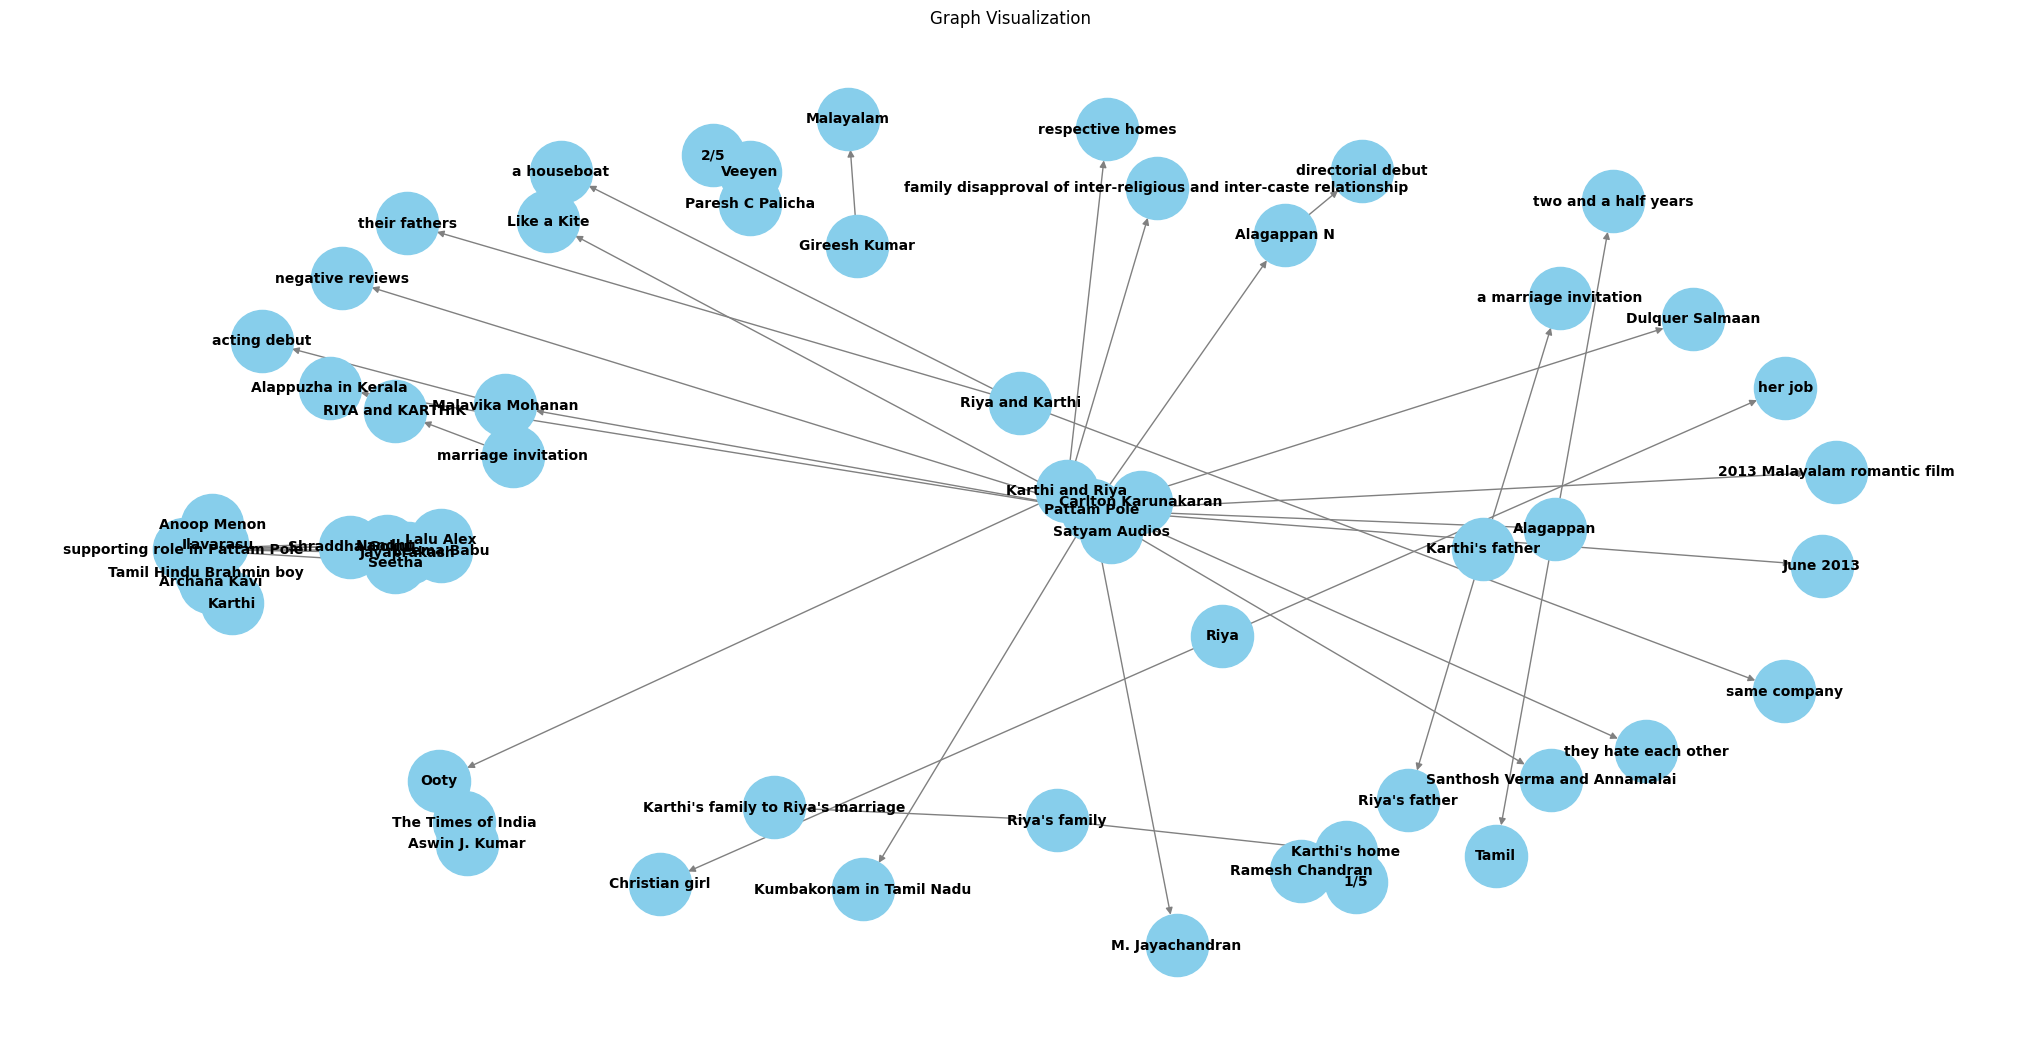

In [12]:
# Visualize the graph using matplotlib
plt.figure(figsize=(20, 10))
nx.draw(graph, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Graph Visualization")
plt.show()

In [13]:
import networkx as nx

# Load the graph from a GML file
graph = nx.read_gml('graph.gml')

# Display nodes with their attributes
print("Nodes with attributes:")
for node, attrs in graph.nodes(data=True):
    print(f"Node {node}: {attrs}")

# Display edges with their attributes
print("\nEdges with attributes:")
for u, v, attrs in graph.edges(data=True):
    print(f"Edge ({u}, {v}): {attrs}")

Nodes with attributes:
Node Pattam Pole: {}
Node 2013 Malayalam romantic film: {}
Node Like a Kite: {}
Node Alagappan N: {}
Node directorial debut: {}
Node Dulquer Salmaan: {}
Node Malavika Mohanan: {}
Node acting debut: {}
Node Archana Kavi: {}
Node supporting role in Pattam Pole: {}
Node Anoop Menon: {}
Node Lalu Alex: {}
Node Jayaprakash: {}
Node Seetha: {}
Node Leema Babu: {}
Node Shraddha Gokul: {}
Node Nandhu: {}
Node Ilavarasu: {}
Node Karthi: {}
Node Tamil Hindu Brahmin boy: {}
Node Riya: {}
Node Christian girl: {}
Node Karthi and Riya: {}
Node Ooty: {}
Node family disapproval of inter-religious and inter-caste relationship: {}
Node respective homes: {}
Node they hate each other: {}
Node Karthi's father: {}
Node Riya's father: {}
Node Riya's family: {}
Node Karthi's home: {}
Node Karthi's family to Riya's marriage: {}
Node Riya and Karthi: {}
Node same company: {}
Node her job: {}
Node a houseboat: {}
Node their fathers: {}
Node a marriage invitation: {}
Node marriage invitatio

In [14]:
# Load your graph from GML file
graph = nx.read_gml('graph.gml')

# Assign custom attributes to nodes based on existing ones
for node in graph.nodes():
    graph.nodes[node]['title'] = f"Node {node}"  # Example title based on node name
    graph.nodes[node]['group'] = 100               # Group for all nodes
    graph.nodes[node]['color'] = 'blue'          # Default color for all nodes

# Visualize the graph
gv.d3(graph)

In [21]:
# Load the graph from a GML file
graph = nx.read_gml('graph.gml')

# Get positions for nodes
pos = nx.spring_layout(graph)

# Create edge traces
edge_traces = []
for u, v, attrs in graph.edges(data=True):
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_trace = go.Scatter(
        x=[x0, x1, None],
        y=[y0, y1, None],
        mode='lines',
        line=dict(width=0.5, color="gray"),
        hoverinfo='none'
    )
    edge_traces.append(edge_trace)

# Create node trace
node_trace = go.Scatter(
    x=[pos[node][0] for node in graph.nodes()],
    y=[pos[node][1] for node in graph.nodes()],
    mode='markers+text',
    marker=dict(size=10, color='lightblue'),
    text=[node for node in graph.nodes()],
    textposition='top center',
    hoverinfo='text',
    textfont=dict(size=7)
)

# Create edge label trace
edge_label_trace = go.Scatter(
    x=[(pos[u][0] + pos[v][0]) / 2 for u, v, attrs in graph.edges(data=True) if attrs],  # Filter edges with attributes
    y=[(pos[u][1] + pos[v][1]) / 2 for u, v, attrs in graph.edges(data=True) if attrs],
    mode='text',
    text=[attrs['relation'] for u, v, attrs in graph.edges(data=True) if attrs],  # Filter edges with attributes
    textposition='middle center',
    hoverinfo='none',
    textfont=dict(size=7)
)

# Create layout
layout = go.Layout(
    title='Knowledge Graph',
    titlefont_size=16,
    title_x=0.5,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=20, l=5, r=5, t=40),
    xaxis_visible=False,
    yaxis_visible=False
)

# Create Plotly figure
fig = go.Figure(data=edge_traces + [node_trace, edge_label_trace], layout=layout)

# Show the interactive plot
fig.show()